## Laptop Price Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import re
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets - train and test
train = pd.read_csv('laptops_train.csv')
test = pd.read_csv('laptops_test.csv')

In [3]:
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [4]:
test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


In [5]:
# Shape of the datasets
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (977, 13)
Test shape: (325, 13)


In [6]:
# Data types of the columns in train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [7]:
#How many missing values do we have and what is their percentage?
print("The number of missing values: \n"+ str(train.isnull().sum()) +"\n\n" + 
      "The Percentage of Missing Values: \n" + str(train.isnull().sum() / len(train) * 100))

The number of missing values: 
Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

The Percentage of Missing Values: 
Manufacturer                 0.000000
Model Name                   0.000000
Category                     0.000000
Screen Size                  0.000000
Screen                       0.000000
CPU                          0.000000
RAM                          0.000000
 Storage                     0.000000
GPU                          0.000000
Operating System             0.000000
Operating System Version    13.920164
Weight                       0.000000
Price                        0.000000
dtype: flo

In [8]:
# No of duplicate records
print('No of duplicate records:', train.duplicated().sum())

No of duplicate records: 0


In [9]:
# Summary of the dataset
train.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [10]:
# Compare the mean price for each column
def compare_means(df, discrete_col, continuous_col):
    group = df.groupby([discrete_col], as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=discrete_col, y=continuous_col, data=group, palette='Reds')
    plt.ylabel('Mean ' + continuous_col)
    plt.show()

Target Variable: Price

<Figure size 720x432 with 0 Axes>

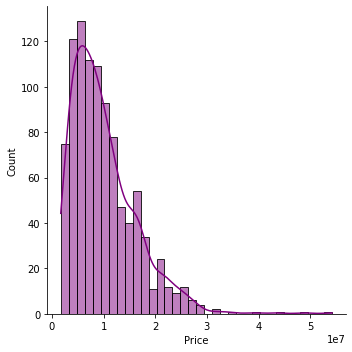

In [11]:
plt.figure(figsize=(10, 6))
sns.displot(train['Price'], kde=True, color='purple')

In [12]:
# Calculate the skewness and kurtosis of the target variable
print('Skewness:', skew(train['Price']))
print('Kurtosis:', kurtosis(train['Price']))

Skewness: 1.6246441522246184
Kurtosis: 5.00517224490561


In [13]:
train['Price'].describe()

count    9.770000e+02
mean     1.001899e+07
std      6.306430e+06
min      1.706375e+06
25%      5.326308e+06
50%      8.527428e+06
75%      1.311570e+07
max      5.423231e+07
Name: Price, dtype: float64

General Data Preprocessing Note

In [14]:
from pycaret.anomaly import *
s = setup(train, session_id=42)

,Description,Value
0,Session id,42
1,Original data shape,"(977, 13)"
2,Transformed data shape,"(977, 995)"
3,Numeric features,1
4,Categorical features,12
5,Rows with missing values,13.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


Manufacturer Variable

In [15]:
train['Manufacturer'].value_counts()

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: Manufacturer, dtype: int64

In [16]:
train['Manufacturer'].describe()

count      977
unique      19
top       Dell
freq       232
Name: Manufacturer, dtype: object

In [17]:
train['Manufacturer'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

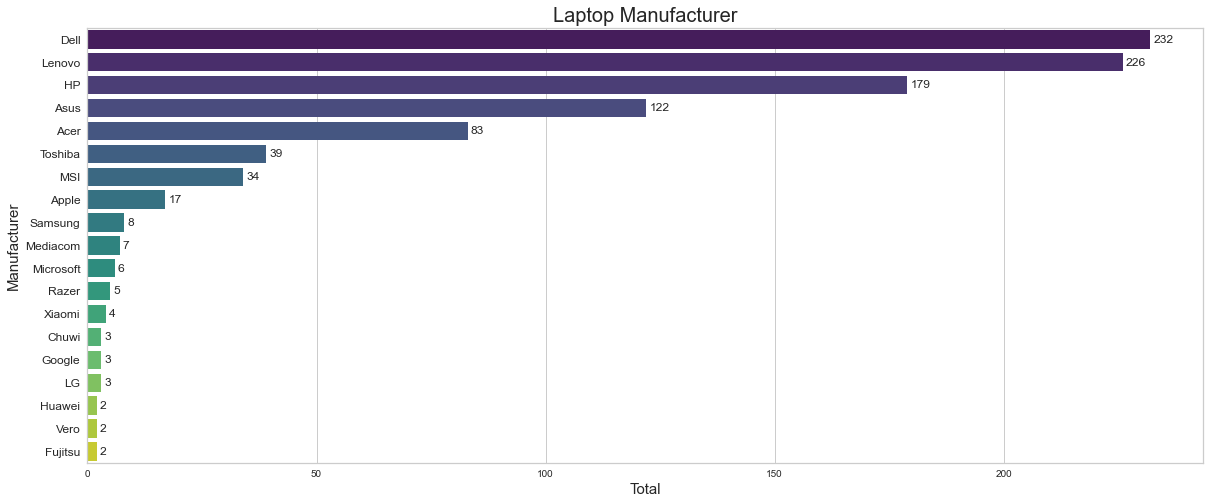

In [18]:
# Plot the graph
plt.subplots(figsize=(20, 8))
p = sns.countplot(y='Manufacturer', data=train, order=train['Manufacturer'].value_counts().index, palette='viridis')
p.axes.set_title('Laptop Manufacturer', fontsize=20)
p.axes.set_xlabel('Total', fontsize=15)
p.axes.set_ylabel('Manufacturer', fontsize=15)
p.axes.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize=12)

for container in p.containers:
    p.bar_label(container, label_type='edge', fontsize=12, padding=3)

plt.show()

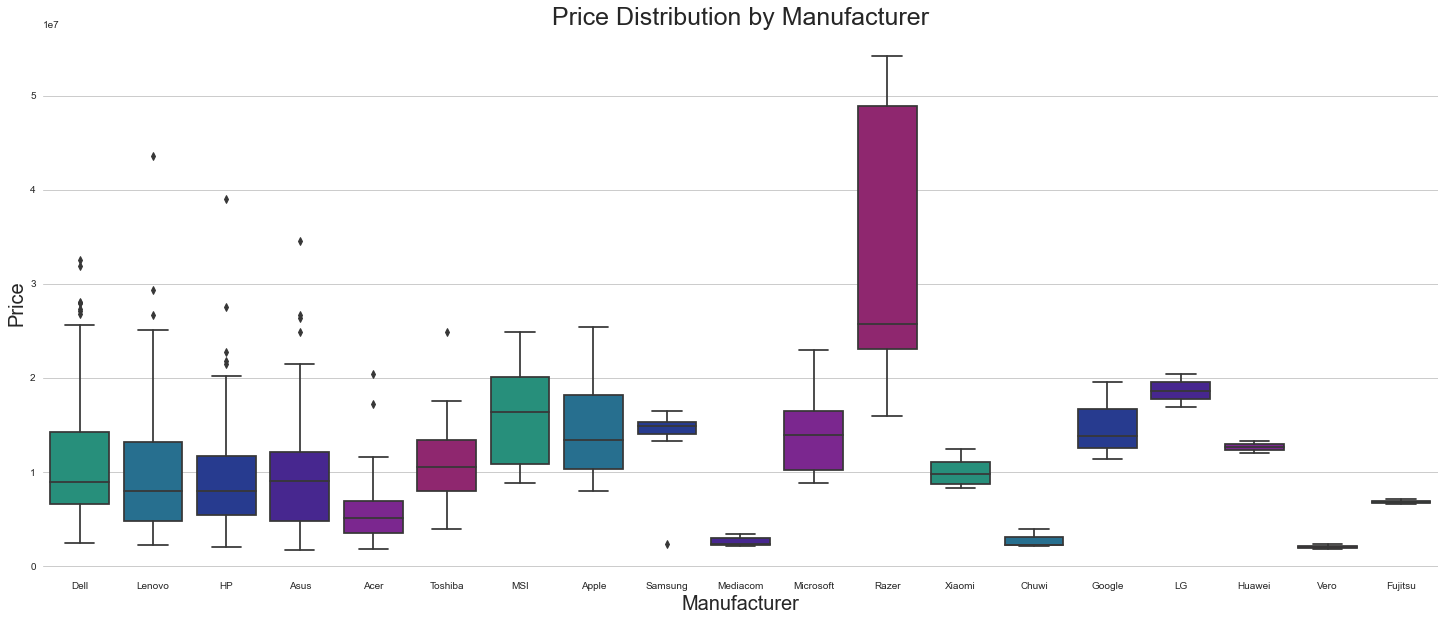

In [19]:
# Price distribution by Manufacturer
plt.subplots(figsize=(25, 10))

p = sns.boxplot(x='Manufacturer', y='Price', data=train, order=train['Manufacturer'].value_counts().index, 
                palette=['#16A085', '#1676A0', '#1631A0', '#4016A0', '#8516A0', '#A01676'])
p.axes.set_title('Price Distribution by Manufacturer', fontsize=25)
p.set_xlabel('Manufacturer', fontsize=20)
p.set_ylabel('Price', fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Model

In [20]:
train['Model Name'].value_counts()

XPS 13                22
Inspiron 3567         20
250 G6                18
Inspiron 5570         18
Vostro 3568           15
                      ..
Rog GL753VE-GC070T     1
Rog GL753VD-GC042T     1
Precision 5520         1
Precision 3510         1
ThinkPad T460          1
Name: Model Name, Length: 488, dtype: int64

In [21]:
train['Model Name'].describe()

count        977
unique       488
top       XPS 13
freq          22
Name: Model Name, dtype: object

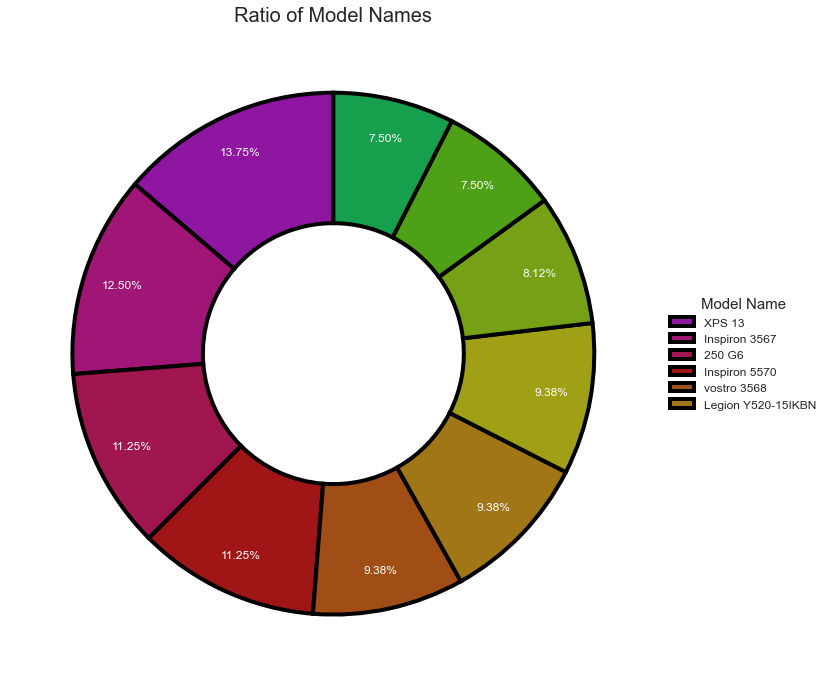

In [22]:
# Ratio of the model names
plt.subplots(figsize=(12, 12))
labels = "XPS 13", "Inspiron 3567", "250 G6", "Inspiron 5570", "vostro 3568", "Legion Y520-15IKBN",
"Alienware 17", "Satellite Pro", "ProBook 450", "Latitude 5580"
size = 0.5
wedges, texts, autotexts = plt.pie([train['Model Name'].value_counts().values[0],
                                    train['Model Name'].value_counts().values[1], 
                                    train['Model Name'].value_counts().values[2], 
                                    train['Model Name'].value_counts().values[3], 
                                    train['Model Name'].value_counts().values[4], 
                                    train['Model Name'].value_counts().values[5], 
                                    train['Model Name'].value_counts().values[6], 
                                    train['Model Name'].value_counts().values[7], 
                                    train['Model Name'].value_counts().values[8], 
                                    train['Model Name'].value_counts().values[9],
                                    ],
                                   explode = (0,0,0,0,0,0,0,0,0,0),
                                   autopct='%.2f%%', startangle=90, pctdistance=0.85,
                                   wedgeprops=dict(width=size, edgecolor='black', linewidth=4), textprops=dict(color='w'), 
                                   colors=["#8E16A0", "#A01676", "#A0164E", "#A01616", "#A04E16", "#A07616", "#A0A016", "#76A016", "#4EA016", "#16A04E"])
plt.legend(wedges, labels, fontsize=12, title='Model Name', title_fontsize='15', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
           edgecolor='black', facecolor='white')
plt.title('Ratio of Model Names', fontsize=20)
plt.show()

Category

In [23]:
train['Category'].value_counts()

Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     85
Workstation            24
Netbook                17
Name: Category, dtype: int64

In [24]:
train['Category'].describe()

count          977
unique           6
top       Notebook
freq           549
Name: Category, dtype: object

In [25]:
train['Category'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

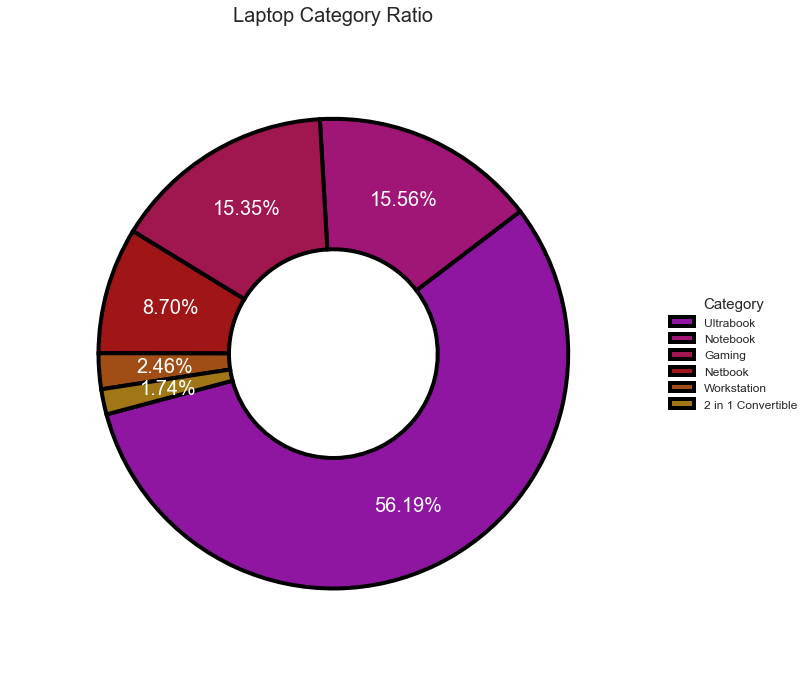

In [26]:
# Laptop Category Ratio
plt.subplots(figsize=(12, 12))
labels = "Ultrabook", "Notebook", "Gaming", "Netbook", "Workstation", "2 in 1 Convertible"
size = 0.5
wedges, texts, autotexts = plt.pie([train['Category'].value_counts().values[0],
                                    train['Category'].value_counts().values[1], 
                                    train['Category'].value_counts().values[2], 
                                    train['Category'].value_counts().values[3], 
                                    train['Category'].value_counts().values[4], 
                                    train['Category'].value_counts().values[5]],
                                   explode = (0,0,0,0,0,0),
                                   autopct='%.2f%%', startangle=-165, pctdistance=0.72, radius=.9,
                                   wedgeprops=dict(width=size, edgecolor='black', linewidth=4), textprops=dict(color='w', size=20), 
                                   colors=["#8E16A0", "#A01676", "#A0164E", "#A01616", "#A04E16", "#A07616"])
plt.legend(wedges, labels, fontsize=12, title='Category', title_fontsize='15', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), 
              edgecolor='black')
plt.title('Laptop Category Ratio', fontsize=20)
plt.show()

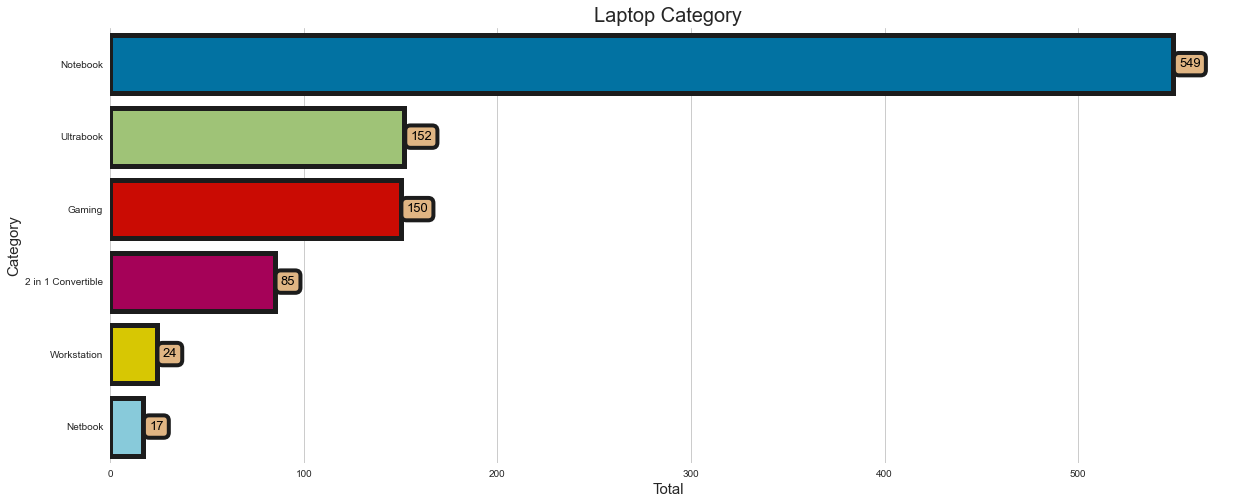

In [27]:
plt.subplots(figsize=(20,8))
p = sns.countplot(y='Category', data=train, order=train['Category'].value_counts().index, saturation=1,
                  edgecolor='#1c1c1c', linewidth=5)
p.axes.set_title('Laptop Category', fontsize=20)
p.set_xlabel('Total', fontsize=15)
p.set_ylabel('Category', fontsize=15)
p.set_yticklabels(p.get_yticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

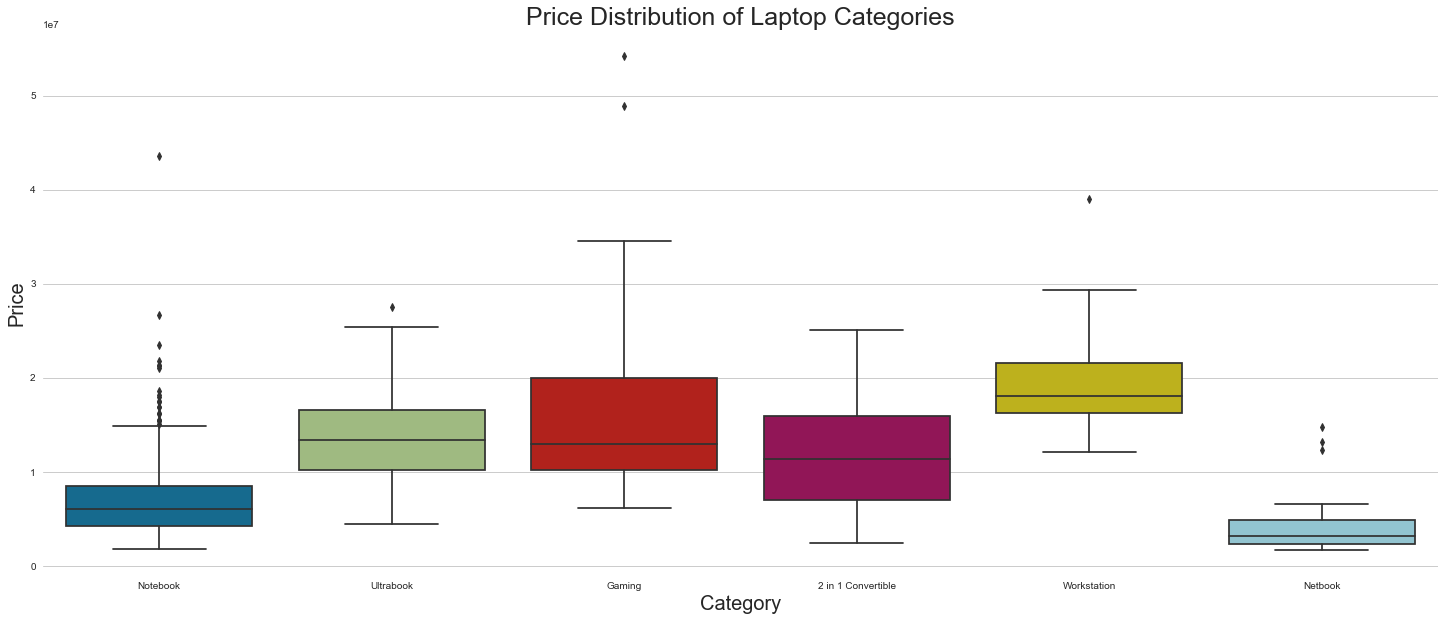

In [28]:
# Price Distribution of Laptop Categories
plt.subplots(figsize=(25, 10))
p = sns.boxplot(x='Category', y='Price', data=train, order=train['Category'].value_counts().index)
p.axes.set_title('Price Distribution of Laptop Categories', fontsize=25)
p.set_xlabel('Category', fontsize=20)
p.set_ylabel('Price', fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

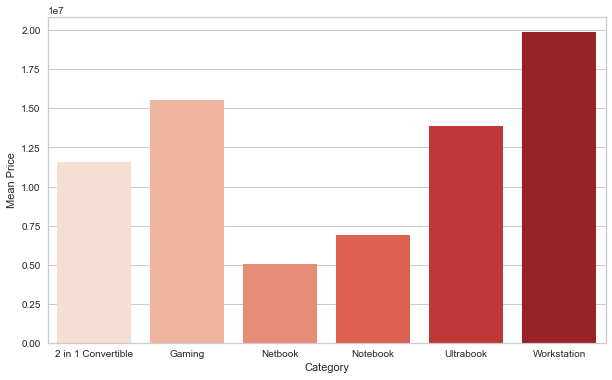

In [29]:
compare_means(train, 'Category', 'Price')

Operating System

In [30]:
train['Operating System'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

In [31]:
train['Operating System'].describe()

count         977
unique          7
top       Windows
freq          837
Name: Operating System, dtype: object

In [32]:
train['Operating System'].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

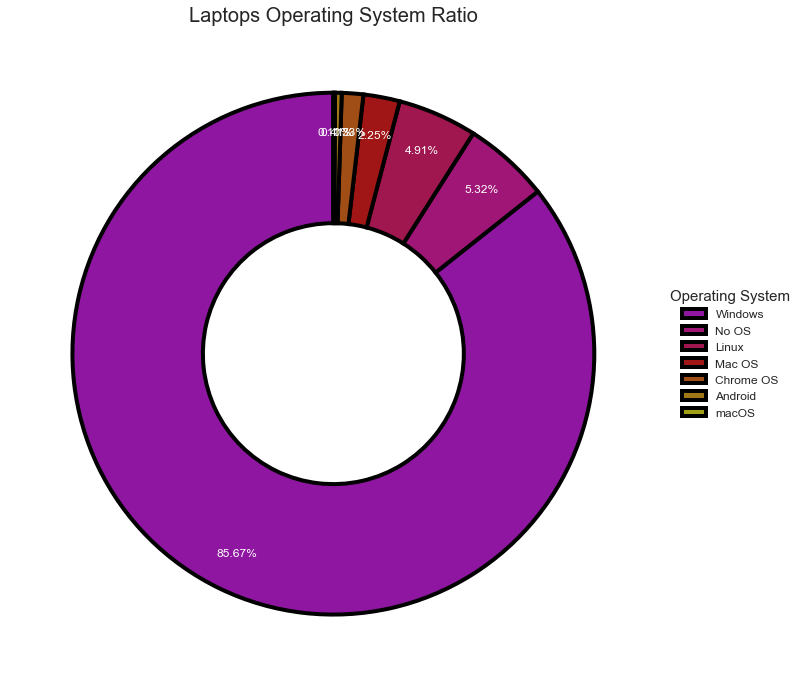

In [33]:
# Laptops Operating System Ratio
plt.subplots(figsize=(12, 12))
labels = "Windows", "No OS", "Linux", "Mac OS", "Chrome OS", "Android", "macOS"
size = 0.5
wedges, texts, autotexts = plt.pie([train['Operating System'].value_counts().values[0],
                                    train['Operating System'].value_counts().values[1], 
                                    train['Operating System'].value_counts().values[2], 
                                    train['Operating System'].value_counts().values[3], 
                                    train['Operating System'].value_counts().values[4], 
                                    train['Operating System'].value_counts().values[5], 
                                    train['Operating System'].value_counts().values[6]],
                                   explode = (0,0,0,0,0,0,0),
                                   autopct='%.2f%%', startangle=90, pctdistance=0.85,
                                   wedgeprops=dict(width=size, edgecolor='black', linewidth=4), textprops=dict(color='w'), 
                                   colors=["#8E16A0", "#A01676", "#A0164E", "#A01616", "#A04E16", "#A07616", "#A0A016"])
plt.legend(wedges, labels, fontsize=12, title='Operating System', title_fontsize='15', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
              edgecolor='black', facecolor='white')
plt.title('Laptops Operating System Ratio', fontsize=20)
plt.show()

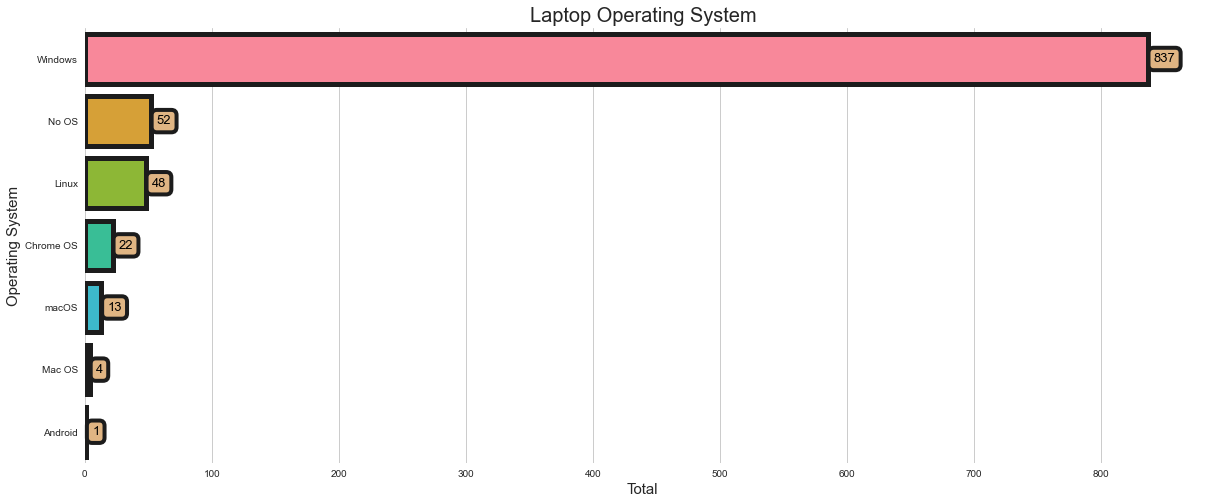

In [34]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(y='Operating System', data=train, order=train['Operating System'].value_counts().index, saturation=1,
                  edgecolor='#1c1c1c', linewidth=5)
p.axes.set_title('Laptop Operating System', fontsize=20)
p.set_xlabel('Total', fontsize=15)
p.set_ylabel('Operating System', fontsize=15)
p.set_yticklabels(p.get_yticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

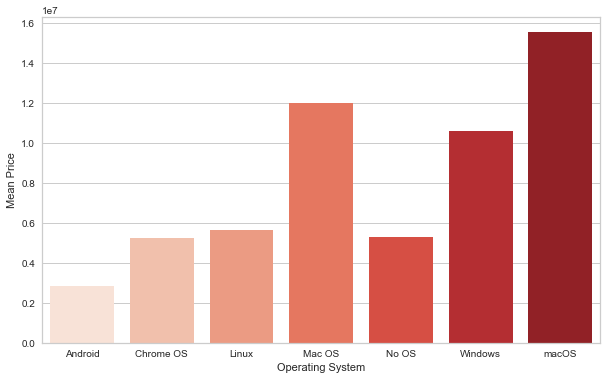

In [35]:
compare_means(train, 'Operating System', 'Price')

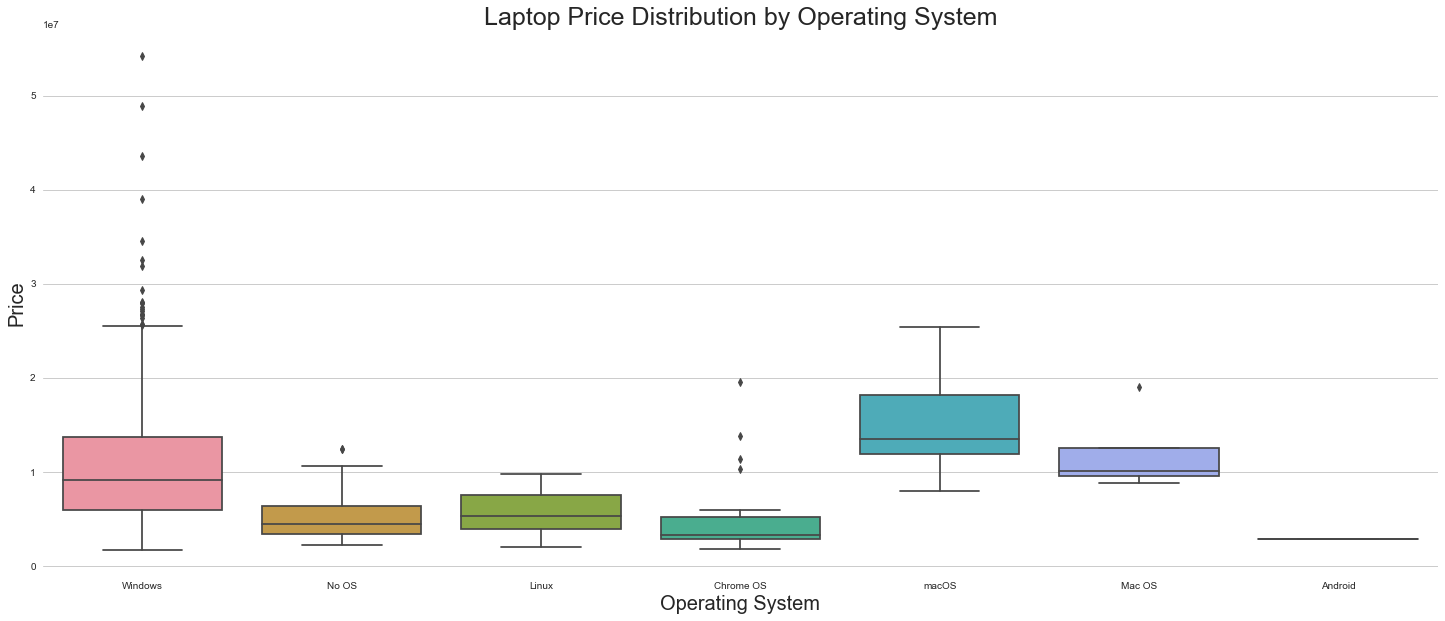

In [36]:
# Laptop Price Distribution by Operating System
plt.subplots(figsize=(25, 10))
p = sns.boxplot(x='Operating System', y='Price', data=train, order=train['Operating System'].value_counts().index)
p.axes.set_title('Laptop Price Distribution by Operating System', fontsize=25)
p.set_xlabel('Operating System', fontsize=20)
p.set_ylabel('Price', fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

Operating System Version

In [37]:
# Identify the missing values
print('Missing values in train dataset:', train.isnull().sum().sum())

Missing values in train dataset: 136


In [38]:
# Percentage of missing values
print('Percentage of missing values in train dataset:', train.isnull().sum().sum() / len(train) * 100)

Percentage of missing values in train dataset: 13.920163766632548


In [39]:
# Fill the null values with the mode of our dataset
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train['Operating System Version'] = imputer.fit_transform(train['Operating System Version'].values.reshape(-1, 1))[:, 0]

In [40]:
train['Operating System Version'].describe()

count     977
unique      4
top        10
freq      955
Name: Operating System Version, dtype: object

In [41]:
train['Operating System Version'].value_counts()

10      955
7        10
10 S      8
X         4
Name: Operating System Version, dtype: int64

In [42]:
train['Operating System Version'].unique()

array(['10', 'X', '10 S', '7'], dtype=object)

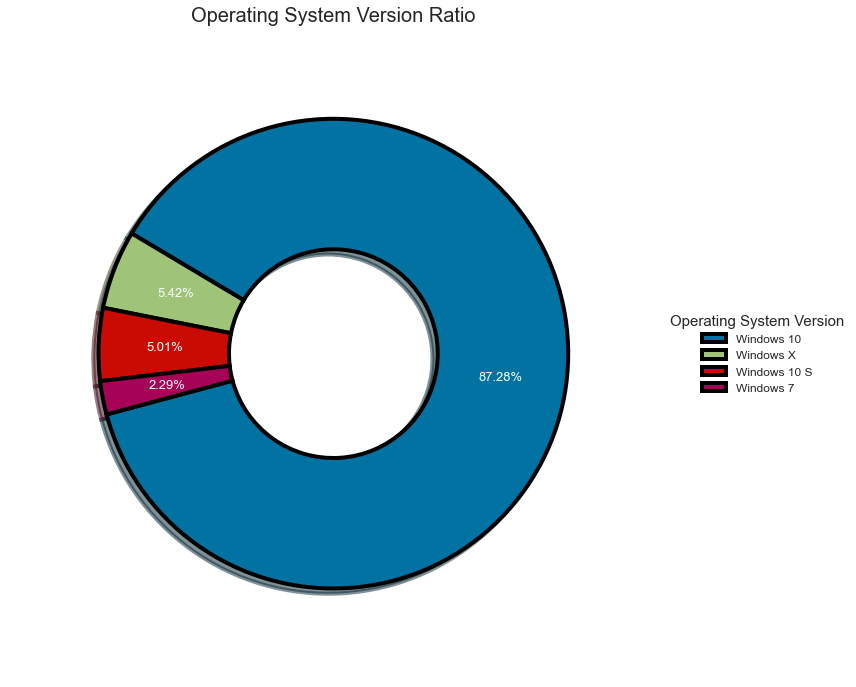

In [43]:
# Ratio of the Operating System Version
plt.subplots(figsize=(12, 12))
labels = "Windows 10", "Windows X", "Windows 10 S", "Windows 7"
size = 0.5
wedges, texts, autotexts = plt.pie([train['Operating System'].value_counts().values[0],
                                    train['Operating System'].value_counts().values[1], 
                                    train['Operating System'].value_counts().values[2], 
                                    train['Operating System'].value_counts().values[3]],
                                   explode = (0,0,0,0),
                                   autopct='%.2f%%', startangle=-165, pctdistance=0.72, radius=.9, shadow=True,
                                   wedgeprops=dict(width=size, edgecolor='black', linewidth=4), textprops=dict(color='w', size=13))
plt.legend(wedges, labels, fontsize=12, title='Operating System Version', title_fontsize='15', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
                edgecolor='black', facecolor='white')
plt.title('Operating System Version Ratio', fontsize=20)
plt.show()

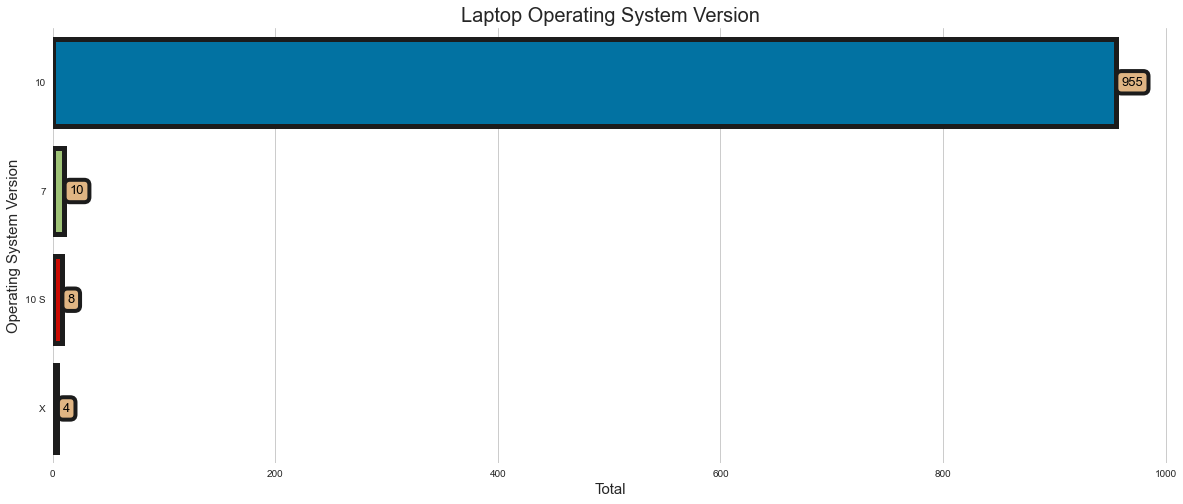

In [44]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(y='Operating System Version', data=train, order=train['Operating System Version'].value_counts().index, saturation=1,
                  edgecolor='#1c1c1c', linewidth=5)
p.axes.set_title('Laptop Operating System Version', fontsize=20)
p.set_xlabel('Total', fontsize=15)
p.set_ylabel('Operating System Version', fontsize=15)
p.set_yticklabels(p.get_yticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

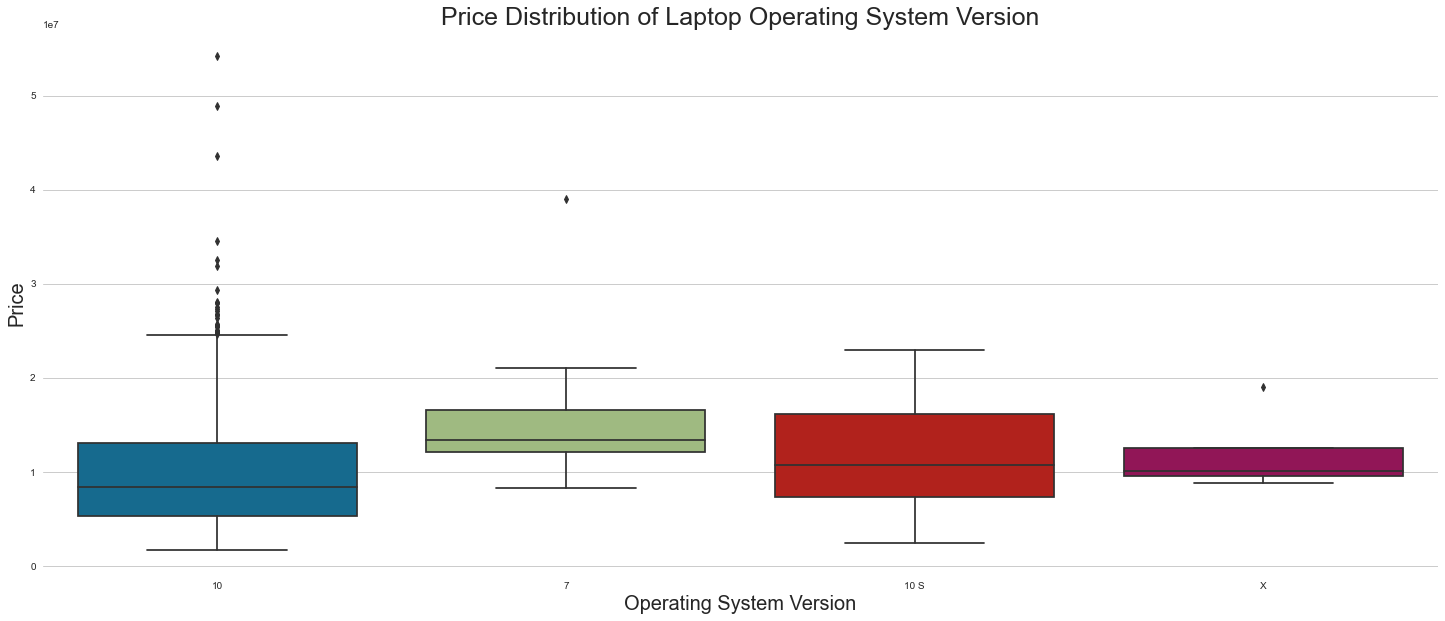

In [45]:
# Price Distribution of Laptop Operating System Version
plt.subplots(figsize=(25, 10))
p = sns.boxplot(x='Operating System Version', y='Price', data=train, order=train['Operating System Version'].value_counts().index)
p.axes.set_title('Price Distribution of Laptop Operating System Version', fontsize=25)
p.set_xlabel('Operating System Version', fontsize=20)
p.set_ylabel('Price', fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

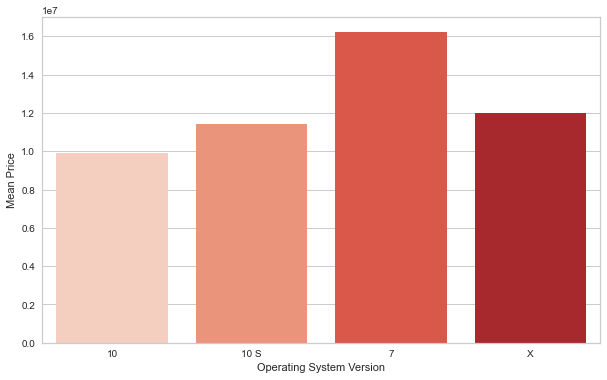

In [46]:
compare_means(train, 'Operating System Version', 'Price')

Weight

In [47]:
train['Weight'].head()

0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
Name: Weight, dtype: object

In [48]:
def clean_weight(train):
    train['Weight'] = train['Weight'].str.replace('kg', '')
    train['Weight'] = train['Weight'].str.replace('kgs', '')
    train['Weight'] = train['Weight'].str.replace('kg,', '')
    train['Weight'] = train['Weight'].str.replace('g', '')
    train['Weight'] = train['Weight'].str.replace('g,', '')
    train['Weight'] = train['Weight'].str.replace('s', '').astype(float)
    return train

In [49]:
train = clean_weight(train)
test = clean_weight(test)

In [50]:
train['Weight'].value_counts()

2.20    99
2.10    45
2.00    40
2.50    32
2.40    27
        ..
1.94     1
4.60     1
4.50     1
2.29     1
2.75     1
Name: Weight, Length: 160, dtype: int64

In [51]:
test['Weight'].value_counts()

2.20    27
2.40    17
2.30    16
2.10    13
2.04    11
        ..
1.05     1
1.10     1
1.35     1
3.35     1
3.58     1
Name: Weight, Length: 94, dtype: int64

In [52]:
train['Weight'].describe()

count    977.000000
mean       2.039128
std        0.666009
min        0.690000
25%        1.500000
50%        2.020000
75%        2.300000
max        4.700000
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Count'>

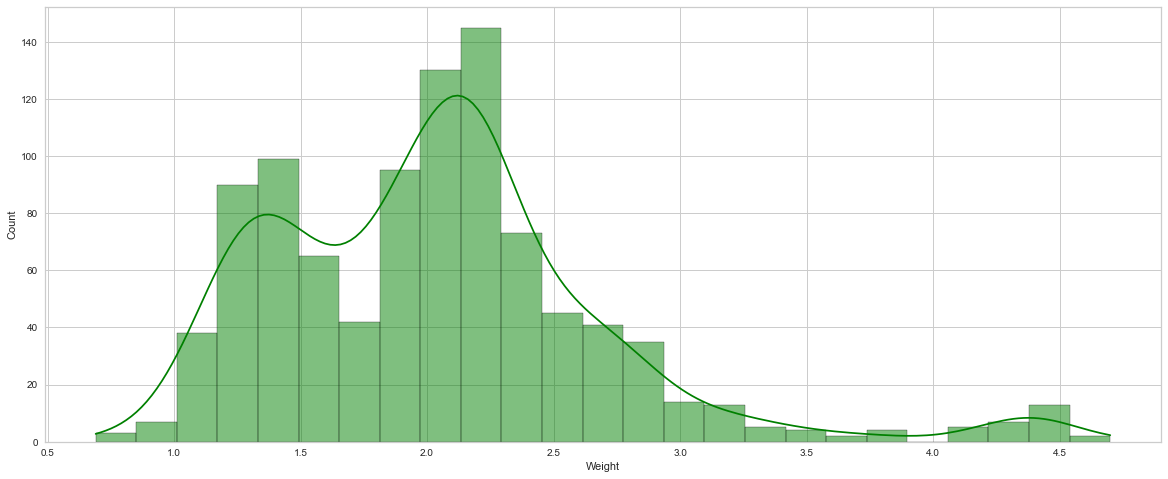

In [53]:
plt.figure(figsize=(20, 8))
sns.histplot(train['Weight'], kde=True, color='green')

<Figure size 864x720 with 0 Axes>

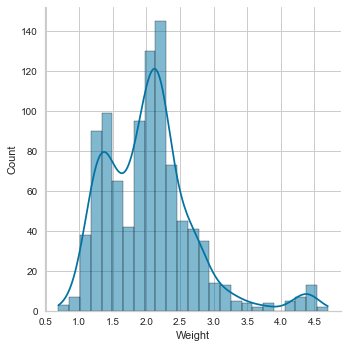

In [56]:
plt.figure(figsize=(12, 10))
sns.displot(train['Weight'], kde=True)

In [58]:
print('The skewness of the weight column:', skew(train['Weight']))

The skewness of the weight column: 1.1831011510738085


In [59]:
print('The kurtosis of the weight column:', kurtosis(train['Weight']))

The kurtosis of the weight column: 2.485130279552717


<AxesSubplot:xlabel='Weight', ylabel='Price'>

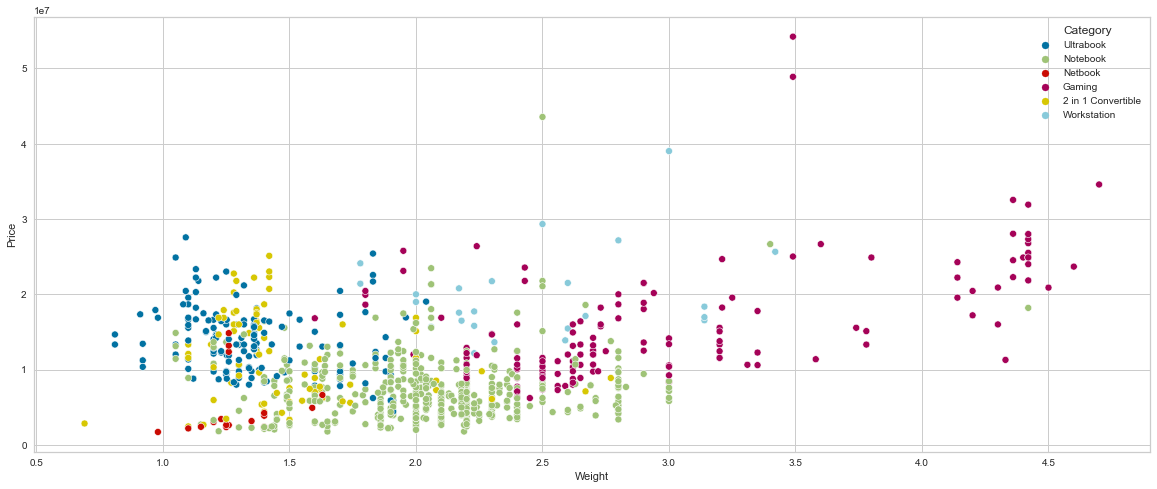

In [61]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Weight', y='Price', data=train, hue='Category')

RAM

In [62]:
train['RAM'].head()

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: RAM, dtype: object

In [63]:
train['RAM'].value_counts()

8GB     483
4GB     271
16GB    149
6GB      24
12GB     21
32GB     16
2GB      10
24GB      3
Name: RAM, dtype: int64

In [64]:
# Since the RAM column is a string, we need to convert it to a numerical value
train['RAM'] = train['RAM'].str.replace('GB', '').astype(float)
train['RAM'].head()

0     8.0
1     8.0
2     8.0
3    16.0
4     8.0
Name: RAM, dtype: float64

In [65]:
test['RAM'] = test['RAM'].str.replace('GB', '').astype(float)
test['RAM'].head()

0     6.0
1    16.0
2    12.0
3     4.0
4     6.0
Name: RAM, dtype: float64

In [66]:
test['RAM'].value_counts()

8.0     136
4.0     104
16.0     50
6.0      17
2.0      12
12.0      4
64.0      1
32.0      1
Name: RAM, dtype: int64

In [67]:
train['RAM'].describe()

count    977.000000
mean       8.528147
std        4.997487
min        2.000000
25%        4.000000
50%        8.000000
75%        8.000000
max       32.000000
Name: RAM, dtype: float64

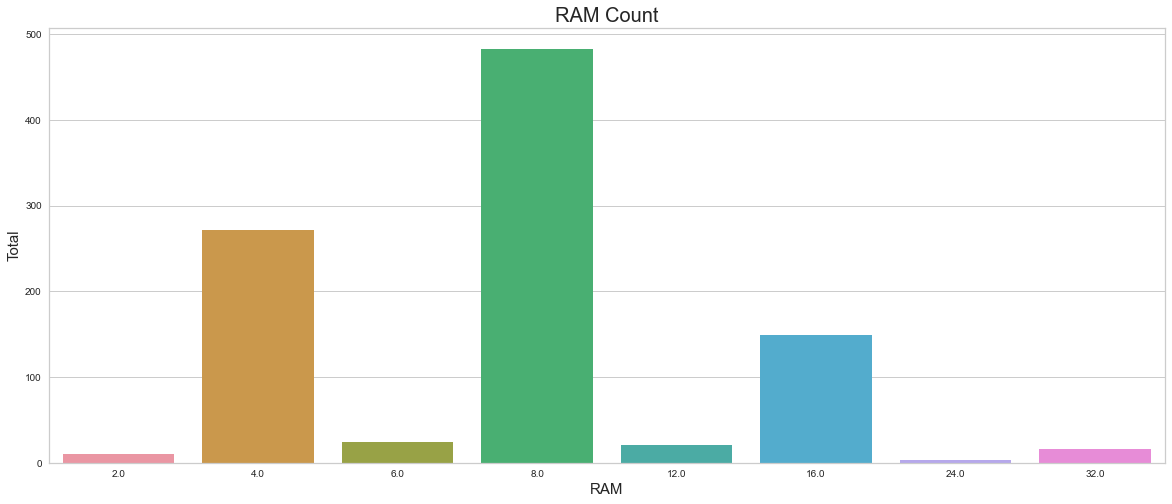

In [68]:
plt.subplots(figsize=(20, 8))
sns.countplot(x='RAM', data=train)
plt.title('RAM Count', fontsize=20)
plt.xlabel('RAM', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

CPU and GPU

In [69]:
train['CPU'].head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: CPU, dtype: object

In [70]:
train['GPU'].head()

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: GPU, dtype: object

In [71]:
def manufacturer(train):
    train['CPU_Manufacturer'] = train['CPU'].str.extract(r'^(\w+)')
    train['GPU_Manufacturer'] = train['GPU'].str.extract(r'^(\w+)')
    return train

In [72]:
train = manufacturer(train)
test = manufacturer(test)

In [73]:
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,CPU_Manufacturer,GPU_Manufacturer
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel


In [74]:
test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,CPU_Manufacturer,GPU_Manufacturer
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6.0,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,Intel,Intel
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,Intel,Nvidia
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,Intel,Intel
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,Intel,Intel
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6.0,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,AMD,AMD


CPU Manufacturers

In [75]:
train['CPU_Manufacturer'].value_counts()

Intel    929
AMD       48
Name: CPU_Manufacturer, dtype: int64

In [76]:
train['CPU_Manufacturer'].describe()

count       977
unique        2
top       Intel
freq        929
Name: CPU_Manufacturer, dtype: object

Let's see the CPU Manufacturer Ratio


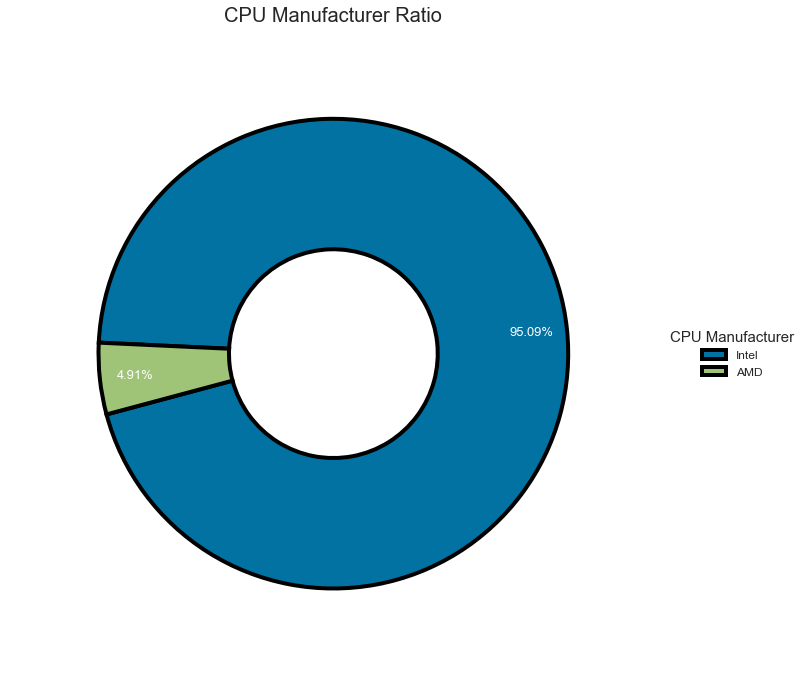

In [78]:
print("Let's see the CPU Manufacturer Ratio")
plt.subplots(figsize=(12, 12))

labels = "Intel", "AMD"
size = 0.5

wedges, texts, autotexts = plt.pie([train['CPU_Manufacturer'].value_counts().values[0],
                                    train['CPU_Manufacturer'].value_counts().values[1]],
                                   explode = (0,0),
                                   autopct='%.2f%%', startangle=-165, pctdistance=0.85, radius=.9,
                                   wedgeprops=dict(width=size, edgecolor='black', linewidth=4), textprops=dict(color='w', size=13), 
                                  )

plt.legend(wedges, labels, fontsize=12, title='CPU Manufacturer', title_fontsize='15', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
              edgecolor='black', facecolor='white')
plt.title('CPU Manufacturer Ratio', fontsize=20)
plt.show()

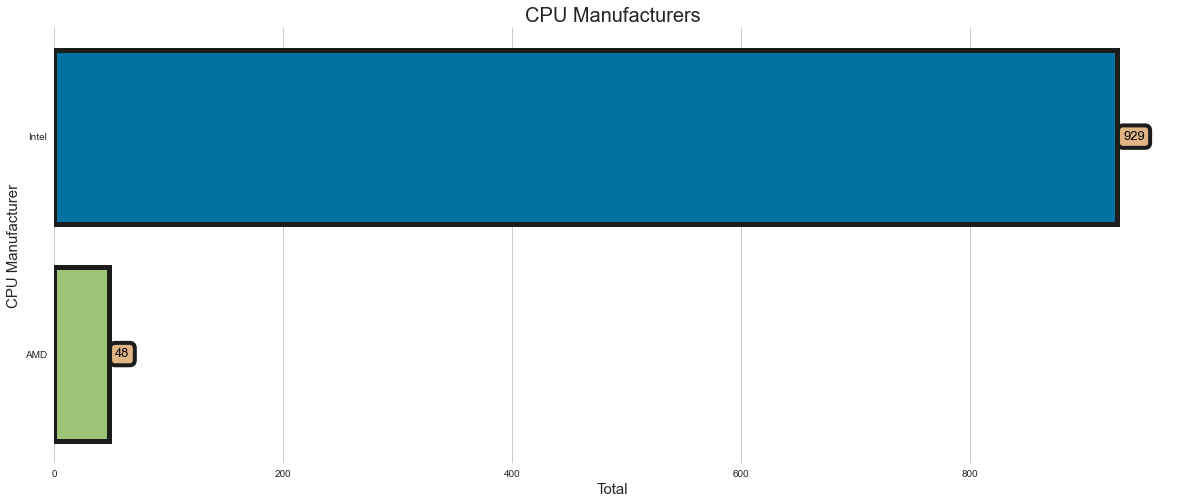

In [79]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(y='CPU_Manufacturer', data=train, order=train['CPU_Manufacturer'].value_counts().index, saturation=1,
                  edgecolor='#1c1c1c', linewidth=5)
p.axes.set_title('CPU Manufacturers', fontsize=20)
p.set_xlabel('Total', fontsize=15)
p.set_ylabel('CPU Manufacturer', fontsize=15)
p.set_yticklabels(p.get_yticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

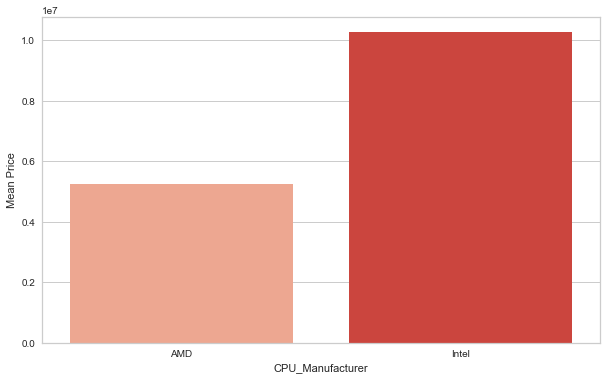

In [80]:
compare_means(train, 'CPU_Manufacturer', 'Price')

GPU Manufacturers

In [81]:
train['GPU_Manufacturer'].value_counts()

Intel     525
Nvidia    310
AMD       142
Name: GPU_Manufacturer, dtype: int64

In [82]:
train['GPU_Manufacturer'].describe()

count       977
unique        3
top       Intel
freq        525
Name: GPU_Manufacturer, dtype: object

Let's see the GPU Manufacturer Ratio


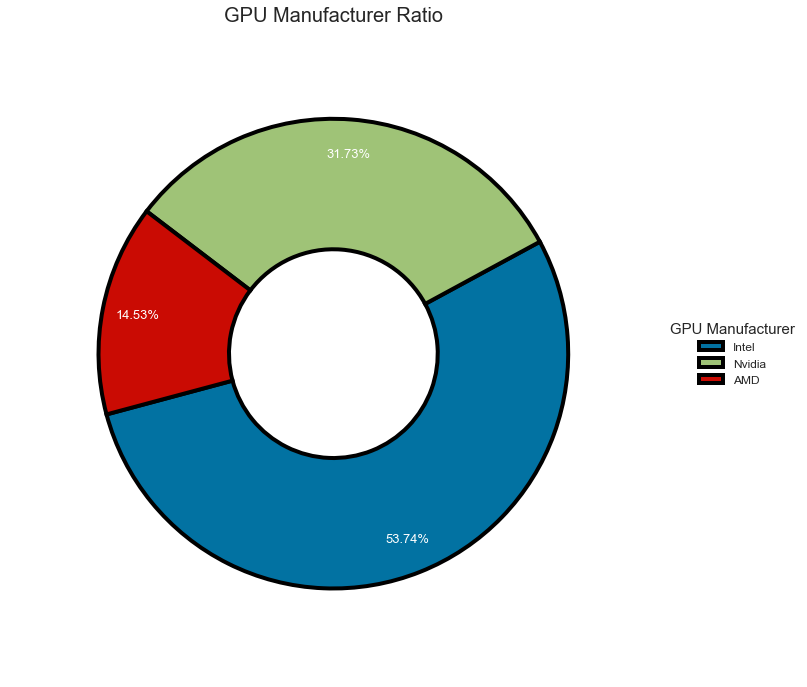

In [83]:
print("Let's see the GPU Manufacturer Ratio")
plt.subplots(figsize=(12, 12))

labels = "Intel", "Nvidia", "AMD"
size = 0.5

wedges, texts, autotexts = plt.pie([train['GPU_Manufacturer'].value_counts().values[0],
                                    train['GPU_Manufacturer'].value_counts().values[1],
                                    train['GPU_Manufacturer'].value_counts().values[2]],
                                   explode = (0,0,0),
                                   autopct='%.2f%%', startangle=-165, pctdistance=0.85, radius=.9,
                                   wedgeprops=dict(width=size, edgecolor='black', linewidth=4), textprops=dict(color='w', size=13), 
                                  )

plt.legend(wedges, labels, fontsize=12, title='GPU Manufacturer', title_fontsize='15', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
                edgecolor='black', facecolor='white')
plt.title('GPU Manufacturer Ratio', fontsize=20)
plt.show()

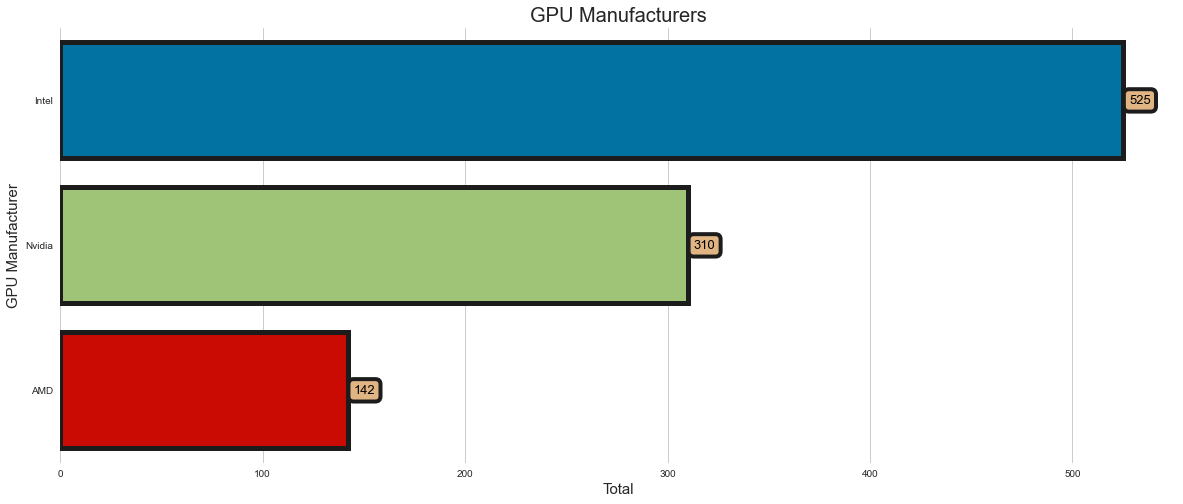

In [84]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(y='GPU_Manufacturer', data=train, order=train['GPU_Manufacturer'].value_counts().index, saturation=1,
                  edgecolor='#1c1c1c', linewidth=5)
p.axes.set_title('GPU Manufacturers', fontsize=20)
p.set_xlabel('Total', fontsize=15)
p.set_ylabel('GPU Manufacturer', fontsize=15)
p.set_yticklabels(p.get_yticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

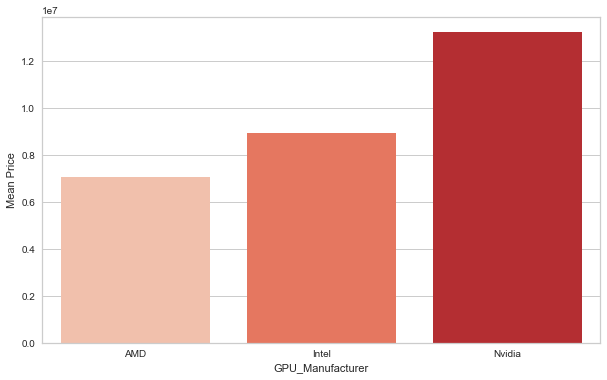

In [85]:
compare_means(train, 'GPU_Manufacturer', 'Price')

Storage

In [86]:
train[' Storage'].value_counts()

256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD      1
2

In [91]:
# We can extract lots of informations from this column. We can see that some laptops have 2 hard drives, there are 4 differnt types of disks: 'SSD', ''HDD', 'Hybrid' and 'Flash Storage'.
# We will create new columns to include all these information

def extract_from_storage(train):
    train["storage1"] = train[" Storage"]
    train['storage1'] = train['storage1'].str.replace('1.0TB','1TB', regex = True)
    train['storage1'] = train['storage1'].str.replace('1TB','1000GB')
    train['storage1'] = train['storage1'].str.replace('2TB','2000GB')
    train['storage1'] = train['storage1'].str.replace('GB','')
    train['storage2'] = train['storage1'].str.replace(r' ','')
    storage1 = []
    storage2 = []
    for i in train['storage2']:
        if len(re.findall(r'\+', i)) == 1: 
            # Double drive
            one = re.findall(r'(\w+)', i)
            storage1.append(one[0])
            storage2.append(one[1])
        else: 
            # Single drive
            one = re.findall(r'(\w+)', i)
            storage1.append(one[0])
            storage2.append('NaN')

    # Extracting size and type of primary storage
    storage1_size = []
    storage1_type = []

    for i in storage1:
        storage1_type.append(re.findall(r'(\D\w+)', i)[0])
        storage1_size.append(re.findall(r'(\d+)', i)[0])

    # Extracting size and type of secondary storage
    storage2_size = []
    storage2_type = []

    for i in storage2:
        if i != 'NaN':
            storage2_type.append(re.findall(r'(\D\w+)', i)[0])
            storage2_size.append(re.findall(r'(\d+)', i)[0])
        else:
            storage2_type.append('NaN')
            storage2_size.append(0)
    
    train['primary_storage_size'] = storage1_size
    train['primary_storage_type'] = storage1_type
    train['secondary_storage_size'] = storage2_size
    train['secondary_storage_type'] = storage2_type
    
    train['primary_storage_size'] = train['primary_storage_size'].astype(float)
    train['secondary_storage_size'] = train['secondary_storage_size'].astype(float)
    train = train.drop(['storage1', 'storage2', ' Storage'], axis=1)
    train = train.replace('NaN', np.nan)
    return train

In [92]:
train = extract_from_storage(train)
test = extract_from_storage(test)

In [93]:
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price,CPU_Manufacturer,GPU_Manufacturer,primary_storage_size,primary_storage_type,secondary_storage_size,secondary_storage_type
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0,NaN


In [94]:
test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price,CPU_Manufacturer,GPU_Manufacturer,primary_storage_size,primary_storage_type,secondary_storage_size,secondary_storage_type
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6.0,Intel HD Graphics 620,Windows,10,2.04,5148468.0,Intel,Intel,1000.0,HDD,0.0,NaN
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,Intel,Nvidia,256.0,SSD,1000.0,HDD
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,Intel HD Graphics 620,Windows,10,2.19,11550708.0,Intel,Intel,512.0,SSD,0.0,NaN
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4.0,Intel HD Graphics 520,Windows,7,1.20,10625940.0,Intel,Intel,128.0,SSD,0.0,NaN
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6.0,AMD Radeon 530,Windows,10,2.20,4881708.0,AMD,AMD,256.0,SSD,0.0,NaN


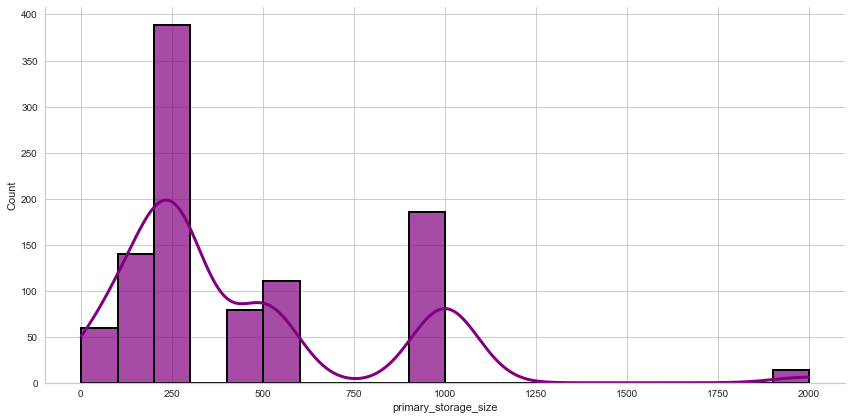

In [98]:
sns.displot(train['primary_storage_size'], kde=True, color='purple',
             height=6, aspect=2, linewidth=2, edgecolor='black', alpha=0.7, bins=20, line_kws={'linewidth': 3})

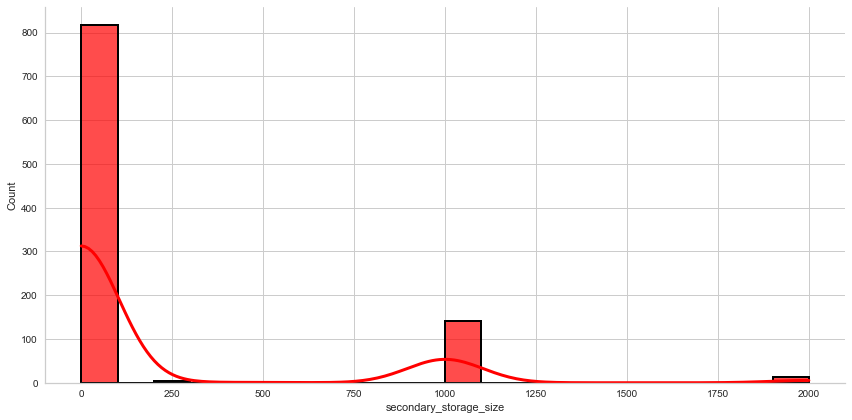

In [101]:
sns.displot(train['secondary_storage_size'], kde=True, color='red',
                height=6, aspect=2, linewidth=2, edgecolor='black', alpha=0.7, bins=20, line_kws={'linewidth': 3})

In [103]:
train['secondary_storage_type'].isnull().sum()

818

In [104]:
train['secondary_storage_type'] = train['secondary_storage_type'].dropna()

In [105]:
train['secondary_storage_type'].value_counts()

HDD    155
SSD      4
Name: secondary_storage_type, dtype: int64

In [107]:
#Due to lots of null values within the "secondarystorage_type" column, we should drop it
train = train.drop(["secondary_storage_type"], axis = 1)
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price,CPU_Manufacturer,GPU_Manufacturer,primary_storage_size,primary_storage_type,secondary_storage_size
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0


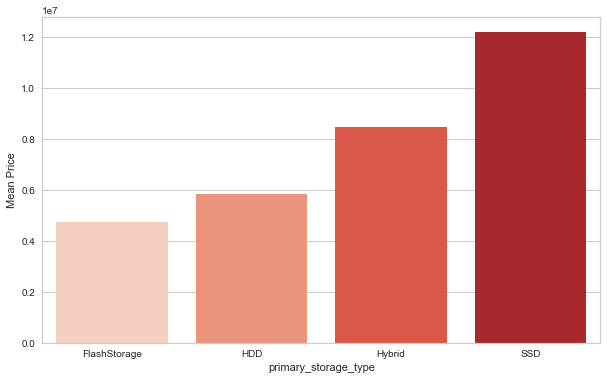

In [108]:
compare_means(train, 'primary_storage_type', 'Price')

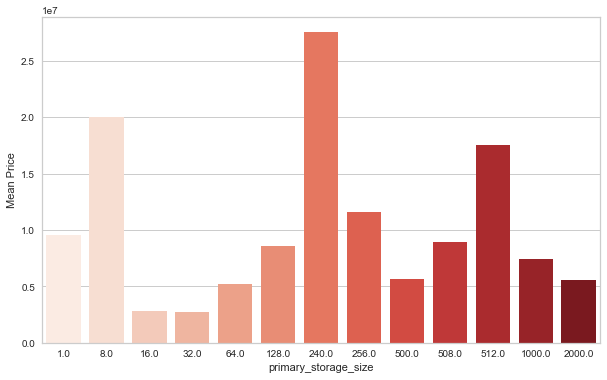

In [109]:
compare_means(train, 'primary_storage_size', 'Price')

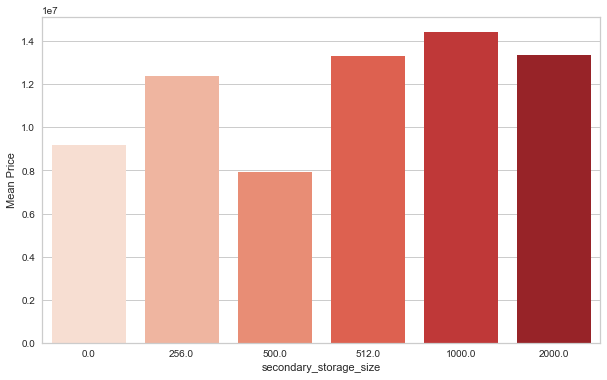

In [111]:
compare_means(train, 'secondary_storage_size', 'Price')